# Literature Counts

This notebook uses automated literature searches to collect co-occurence data for the aperiodic-clinical project. 

Tools:
- literature searches and analyses are done with the [lisc](https://lisc-tools.github.io/lisc/) module

In [1]:
# Import LISC code
from lisc import Counts
from lisc.plts.counts import plot_matrix
from lisc.collect import collect_info

In [2]:
# Import local code
from local.terms import TERMS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Data collection settings
RUN_COLLECTION = True

In [5]:
# Settings for literature collection
db = 'pubmed'

### Metadata Check

In [6]:
if RUN_COLLECTION:
    meta_data = collect_info()

In [7]:
meta_data

{'date': '2024-10-14_14:20:41', 'log': None, 'requester_n_requests': 1, 'requester_wait_time': 0.3333333333333333, 'requester_start_time': '14:20:41 Monday 14 October 2024', 'requester_end_time': '14:20:41 Monday 14 October 2024', 'requester_logging': None, 'db_info_dbname': 'pubmed', 'db_info_menuname': 'PubMed', 'db_info_description': 'PubMed bibliographic record', 'db_info_dbbuild': 'Build-2024.10.14.07.15', 'db_info_count': '37861694', 'db_info_lastupdate': '2024/10/14 07:15'}

## Counts - Clinical

Count the co-occurence between aperiodic measure related terms and general clinical terms.

In [8]:
# Initialize counts object
counts = Counts()

In [9]:
# Add association terms to the LISC object
counts.add_terms(TERMS['AP'], dim='A')
counts.add_terms(TERMS['CLINICAL'], dim='B')

In [10]:
# Check terms - A
counts.terms['A'].check_terms()

List of terms used: 

aperiodic exponent  : aperiodic exponent, aperiodic slope, spectral exponent, spectral slope, 1/f slope, 1/f exponent


In [11]:
# Check terms - B
counts.terms['B'].check_terms()

List of terms used: 

clinical   : clinical
disorder   : disorder, disease
biomarker  : biomarker
diagnosis  : diagnosis, diagnostic
treatment  : treatment


In [12]:
# Run the data collection
if RUN_COLLECTION:
    counts.run_collection(db=db)

### Check Collection

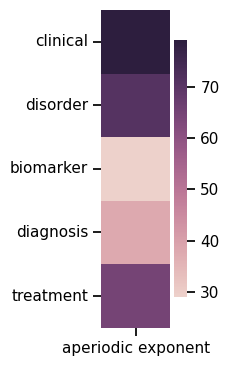

In [13]:
# Check the results of the link
plot_matrix(counts.counts.T,
            counts.terms['A'].labels,
            counts.terms['B'].labels, 
            figsize=(2.5, 4))

## Counts - Disorders

Count the co-occurence between aperiodic measure related terms and disorder related terms.

In [14]:
# Initialize counts object
counts = Counts()

In [15]:
# Add association terms to the LISC object
counts.add_terms(TERMS['AP'], dim='A')
counts.add_terms(TERMS['DISORDERS'], dim='B')

In [16]:
# Check terms - A
counts.terms['A'].check_terms()

List of terms used: 

aperiodic exponent  : aperiodic exponent, aperiodic slope, spectral exponent, spectral slope, 1/f slope, 1/f exponent


In [17]:
# Check terms - B
counts.terms['B'].check_terms()

List of terms used: 

parkinson's                  : parkinson's
epilepsy                     : epilepsy, seizure
ADHD                         : ADHD, attention deficit hyperactivity disorder
autism                       : autism, ASD
alzheimers                   : alzheimers, dementia
disorders of consciousness   : disorders of consciousness, coma, locked-in
depression                   : depression, MDD, major depressive disorder
schizophrenia                : schizophrenia
stroke                       : stroke
dystonia                     : dystonia
TBI                          : TBI, traumatic brain injury
dyslexia                     : dyslexia
glioma                       : glioma
huntington's                 : huntington's
multiple sclerosis           : multiple sclerosis
PTSD                         : PTSD, post traumatic stress disorder
REM sleep behavior disorder  : REM sleep behavior disorder
rett syndrome                : rett syndrome
22q.11.2                     : 22q.11.

In [18]:
# Run the data collection
if RUN_COLLECTION:
    counts.run_collection(db=db)

### Check Collection

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/lisc/plts/counts.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


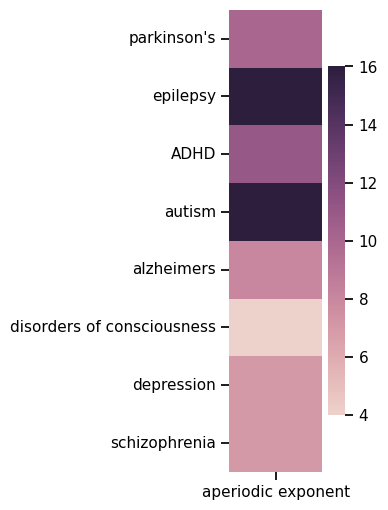

In [19]:
# Plot the collected data results - top disorders
plot_matrix(counts.counts.T[:8],
            counts.terms['A'].labels,
            counts.terms['B'].labels[:8], 
            figsize=(1.5, 6))

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/lisc/plts/counts.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


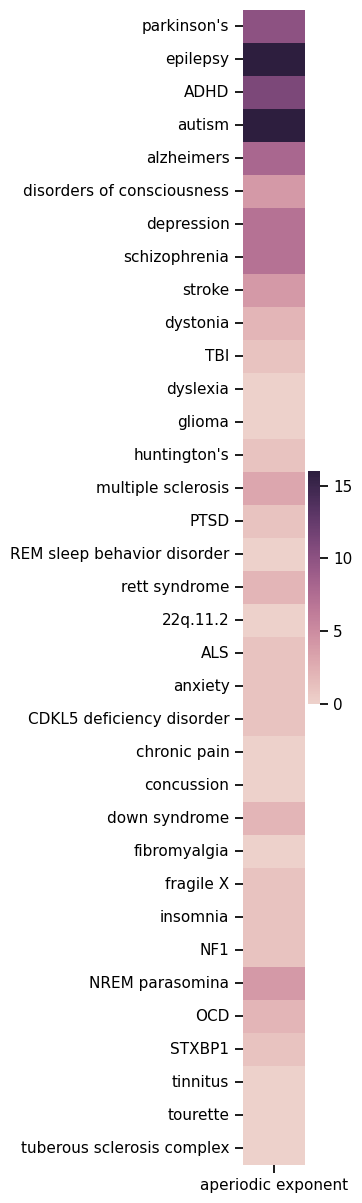

In [20]:
# Plot the collected data results - all disorders
plot_matrix(counts.counts.T,
            counts.terms['A'].labels,
            counts.terms['B'].labels, 
            figsize=(1, 15))